# Entropy of CO2 mixing

Colin Ophus - 2025 Jan 2

This notebook plots the entropy of mixing a closed isothermal system consisting of two chambers at equal pressure:
- A volume fraction $\alpha$ of CO2
- A volume fraction $1-\alpha$ of other gases

The entropy of mixing is equal to
- $\Delta S_\text{mix} = -n_\text{total} R [\alpha \ln \alpha + (1+\alpha) \ln (1+\alpha)]$

We will also plot the contributions from each individual side of the system, and the specific entropy for CO$_2$, which is equal to
- $\Delta S_\text{mix} = \Big[\frac{R}{\alpha}\Big]  [\alpha \ln \alpha + (1+\alpha) \ln (1+\alpha)]$

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# Define x*log(x) function
def x_log_x(x):
    # f(x) = x * log(x)
    f = np.zeros_like(x)
    sub = np.logical_and(
        x > 0.0, 
        x < 1.0,
    )
    f[sub] = x[sub] * np.log(x[sub])
    return f
    
# Calculate entropy of mixing
alpha = np.linspace(0.0,1.0,1001)

s_mix_co2 = -x_log_x(alpha)
s_mix_other = -x_log_x(1-alpha)

s_mix = s_mix_co2 + s_mix_other

s_mix_specific_co2 = s_mix.copy()
s_mix_specific_co2[1:] /= alpha[1:]

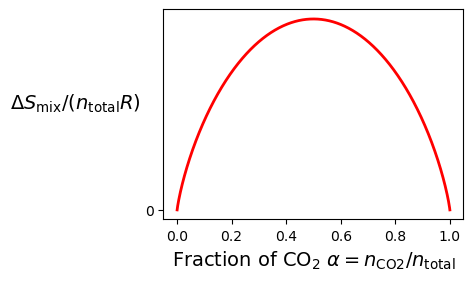

In [54]:
#| label: entropy_co2_mixing

# Create figure and axes manually
fig = plt.figure(figsize=(6, 3))
ax = fig.add_axes([0.1, 0.2, 0.5, 0.7])  # [left, bottom, width, height]

# Plot the result
ax.plot(
    alpha,
    s_mix,
    color='r',
    linewidth=2,
)

# Set axis labels with LaTeX formatting
ax.set_xlabel(
    r'Fraction of CO$_2$ $\alpha = n_{\text{CO2}} / n_{\text{total}}$',
    fontsize=14,
)
ax.set_ylabel(
    r'$\Delta S_{\text{mix}} / (n_{\text{total}} R)$',
    fontsize=14, 
    labelpad=50, 
    rotation=0,
)

# Remove y-axis ticks except for y = 0
ax.set_yticks(np.atleast_1d(0))

# Show plot
plt.show()


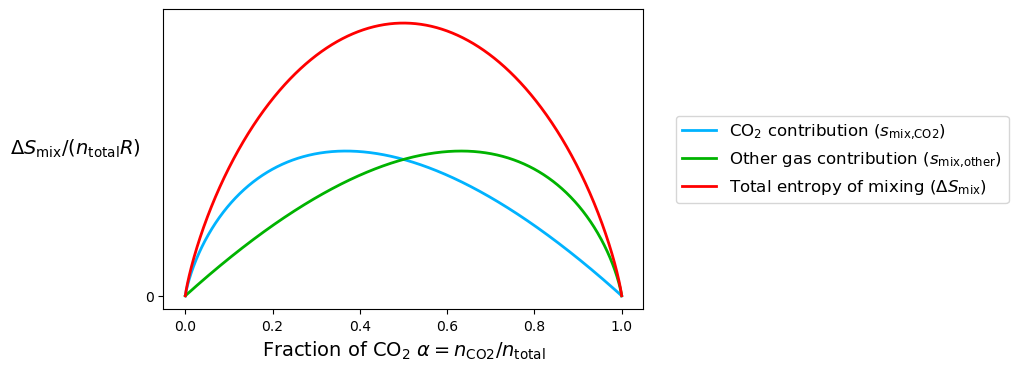

In [55]:
#| label: entropy_mixing_contributions

# Create figure and axes manually
fig = plt.figure(figsize=(6, 5))
ax = fig.add_axes([0.1, 0.2, 0.8, 0.6])  # [left, bottom, width, height]

# Plot the contributions
ax.plot(
    alpha,
    s_mix_co2,
    color=(0, 0.7, 1.0),  # RGB color for CO2 contribution
    linewidth=2,
    label=r'CO$_2$ contribution ($s_\text{mix,CO2}$)',
)
ax.plot(
    alpha,
    s_mix_other,
    color=(0, 0.7, 0),  # RGB color for other gas contribution
    linewidth=2,
    label=r'Other gas contribution ($s_\text{mix,other}$)',
)
# Plot the total entropy of mixing
ax.plot(
    alpha,
    s_mix,
    color='r',
    linewidth=2,
    label=r'Total entropy of mixing ($\Delta S_\text{mix}$)',
)

# Set axis labels with LaTeX formatting
ax.set_xlabel(
    r'Fraction of CO$_2$ $\alpha = n_{\text{CO2}} / n_{\text{total}}$',
    fontsize=14,
)
ax.set_ylabel(
    r'$\Delta S_{\text{mix}} / (n_{\text{total}} R)$',
    fontsize=14, 
    labelpad=50, 
    rotation=0,
)

# Remove y-axis ticks except for y = 0
ax.set_yticks(np.atleast_1d(0))

# Add legend
ax.legend(fontsize=12, loc='center left', bbox_to_anchor=(1.05, 0.5))

# Show plot
plt.show()


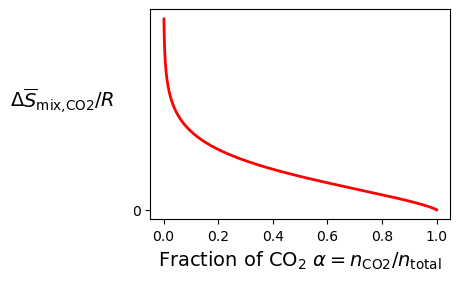

In [58]:
#| label: specific_entropy_co2

# Create figure and axes manually
fig = plt.figure(figsize=(6, 3))
ax = fig.add_axes([0.1, 0.2, 0.5, 0.7])  # [left, bottom, width, height]

# Plot the result
ax.plot(
    alpha[1:],
    s_mix_specific_co2[1:],
    color='r',
    linewidth=2,
)

# Set axis labels with LaTeX formatting
ax.set_xlabel(
    r'Fraction of CO$_2$ $\alpha = n_{\text{CO2}} / n_{\text{total}}$',
    fontsize=14,
)
ax.set_ylabel(
    r'$\Delta \overline{S}_{\text{mix,CO2}} / R$',
    fontsize=14, 
    labelpad=50, 
    rotation=0,
)

# Remove y-axis ticks except for y = 0
ax.set_yticks(np.atleast_1d(0))

# Show plot
plt.show()
